In [1]:
!conda env list

# conda environments:
#
base                     /opt/anaconda3
alibi                    /opt/anaconda3/envs/alibi
dltutorials              /opt/anaconda3/envs/dltutorials
modAL                 *  /opt/anaconda3/envs/modAL



There are several different query strategies to use, and the key idea here is to pick the most informative/difficult unlabeled data point to 
label so that the data labeling is efficient

Now, let's try a different query strategy (the default is uncertainty sampling in the previous tutorials)

In [2]:
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

Let's try entropy sampling

In [6]:
n_initial = 50
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)

X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)

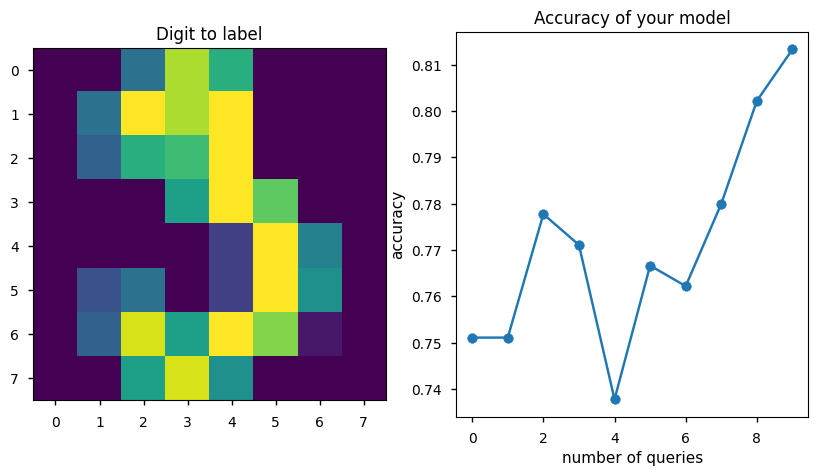

Which digit is this?


 3


/Users/xingyuli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [11]:
## use random sampling
from modAL.uncertainty import entropy_sampling

learner = ActiveLearner(
    estimator=RandomForestClassifier(),
    query_strategy=entropy_sampling,
    X_training=X_initial, y_training=y_initial
)

n_queries = 10

accuracy_scores = [learner.score(X_test, y_test)]

for i in range(n_queries):
    display.clear_output(wait=True)
    query_idx, query_inst = learner.query(X_pool)
    with plt.style.context('seaborn-v0_8-notebook'):
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.title('Digit to label')
        plt.imshow(query_inst.reshape(8, 8))
        plt.subplot(1, 2, 2)
        plt.title('Accuracy of your model')
        plt.plot(range(i+1), accuracy_scores)
        plt.scatter(range(i+1), accuracy_scores)
        plt.xlabel('number of queries')
        plt.ylabel('accuracy')
        display.display(plt.gcf())
        plt.close('all')

    print("Which digit is this?")
    y_new = np.array([int(input())], dtype=int)
    learner.teach(query_inst.reshape(1, -1), y_new)
    X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
    accuracy_scores.append(learner.score(X_test, y_test))

let's list another available query strategy (and we can always define our own)

In [12]:
import modAL

In [13]:
modAL.uncertainty.margin_sampling

<function modAL.uncertainty.margin_sampling(classifier: sklearn.base.BaseEstimator, X: Union[scipy.sparse._csr.csr_matrix, pandas.core.frame.DataFrame, numpy.ndarray, list], n_instances: int = 1, random_tie_break: bool = False, **uncertainty_measure_kwargs) -> numpy.ndarray>